# Data Mountain Query

***


Tools for working with Twitter data stored in MongoDB,
including database connections, parsing, visualization and sentiment analysis.

Core class `Counters()` handles:


* Database Connections
* Local Caching
* Query Metadata
* Aggregation
* Timeseries Plotting
* Sentiment Timeseries
* Sentiment Shifts 



## Installation
To run this notebook on the VACC, you need clone this repo from gitlab using:

`git clone https://gitlab.com/compstorylab/data-mountain-query.git`

Next create a conda environment for the project:

`conda create -n data-mountain-query`

activate it:

`conda activate data-mountain-query`

and install this package by moving into the correct directory:

`cd data-mountain-query && pip install -e .`

If all goes well, you just need to install the ipykernel.

```python -m ipykernel install --user --name data-mountain-query --display-name "Python (data-mountain-query)"```

Now, you should be able to start a notebook on https://vacc-ondemand.uvm.edu and select the newly available kernel *Python (data-mountain-query)*.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from data_mountain_query.counters import AmbientTweetCounters

import warnings
warnings.filterwarnings('ignore')

## Counters Object
Counters objects are designed to contain all essential metadata to reproduce a query. 

Attributes include:

* dates: a Pandas DatetimeIndex
* scheme: n-grams to parse (defaults to 1 for 1-grams)

`Counters` is designed to be a general text data object with core methods. Today we'll use a child class `AmbientTweetCounters`, which inherets the methods of `Counters`, but contains extra attributes related to Twitter keyword queries like:

 * anchor: a string keyword to match
 * lang: A FastText language code {'en','ar', 'pt', etc}
 * case_sensitive: A boolean to query based on a case sensitive keyword

In [5]:
start_date = datetime(2015, 1, 1)
end_date = datetime(2023, 5, 1)
dates = pd.date_range(start_date, end_date, freq='2M')
anchor = 'Vermont'

# initialize object
AI_counters = AmbientTweetCounters(dates, anchor)
AI_counters.query(p=0.1) # options are {0.01, 0.1, 1.0}

Connecting on localhost
Querying...


100%|██████████████████████████████████████████████████████████████████| 95457/95457 [00:26<00:00, 3638.46it/s]

Query executed in 27.16s
Tweets processed per second - 3514.56 
11939208


### What's inside a `Counters` object?

Printing shows key metadata like the anchor, dates, language, and what n-grams are being parsed.

In [6]:
print(AI_counters)

Counters object: 
    Anchor - vermont 
    Dates - 2015-01-31 00:00:00 to 2023-03-31 00:00:00
    Scheme - 1grams
    Lang - en
    Save Path - /Users/michael/projects/data-mountain-query/data_mountain_query/../data/ambient/Vermont_2015-01-31_2023-03-31_resolution-0.01_freq_<2 * MonthEnds>_lang_en_ngrams_1.json


Printing `counters.__dict__` shows the messy details: DatetimeIndexes, and lists of Storyon counters for each daterange.

## Plotting Methods

Counters objects have associated plotting methods such as:

   * `plot_ambient_timeseries`
   * `plot_sentiment_timeseries_combined`
   * `plot_sentiment_shift_dates`
   * `plot_sentiment_shift_vs_collapsed`
   * `plot_sentiment_shift_changepoint`
   
Additionally, there are allotaxonometer methods, which for now attempt to execute matlab scripts, but may not work in the jupyter notebook environment:

   * `plot_allotax_shift_dates`
   * `plot_allotax_shift_vs_collapsed`
   * `plot_allotax_shift_changepoint`


Plotting: vermont [noRT] 
Plotting: vermont [All]
Min happs: 5.73
Max happs: 6.28


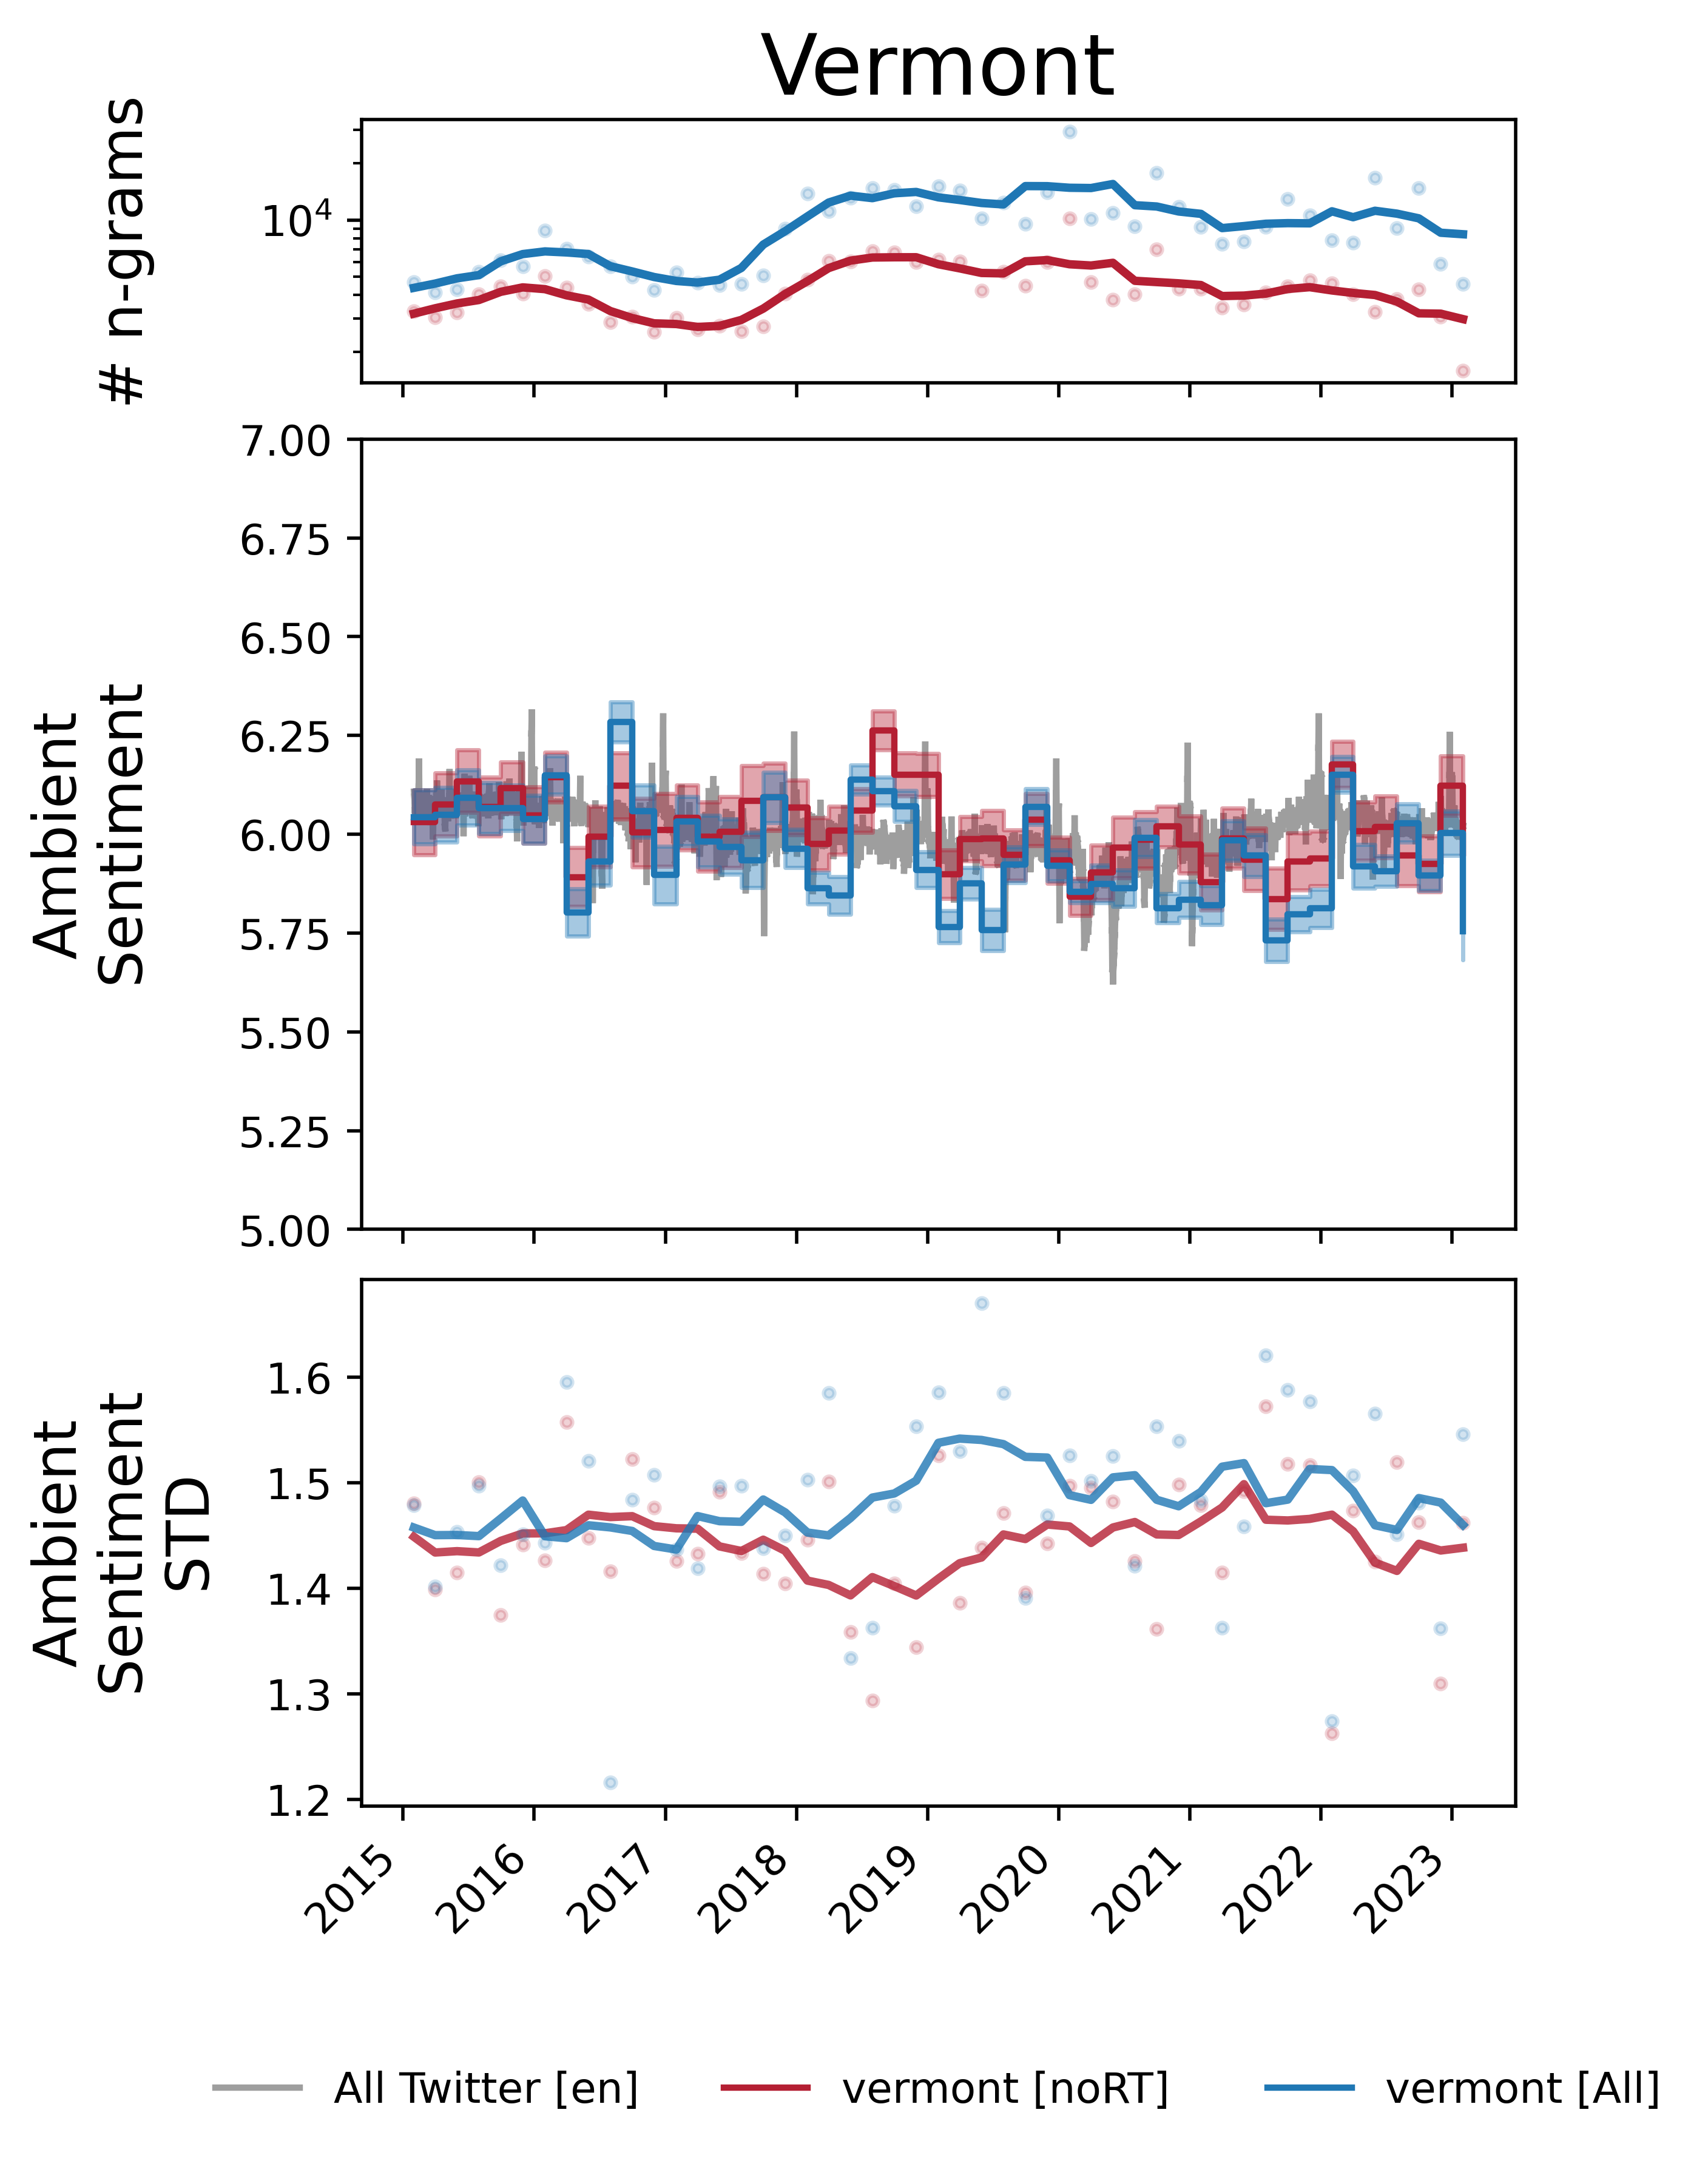

In [7]:
ax1, ax2,ax3 = AI_counters.plot_sentiment_timeseries_combined(ylims=(5.0,7.0));

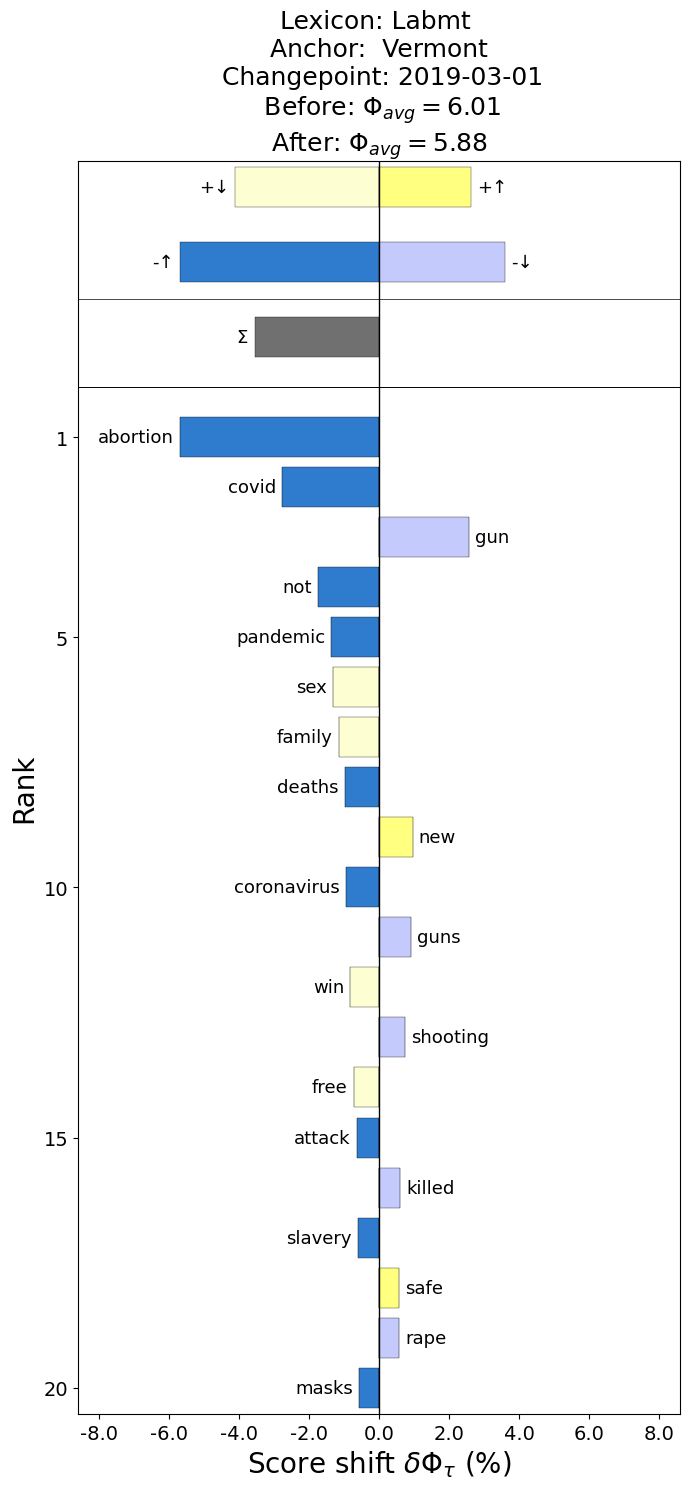

In [10]:
AI_counters.plot_sentiment_shift_changepoint(datetime(2019,3,1),top_n=20);

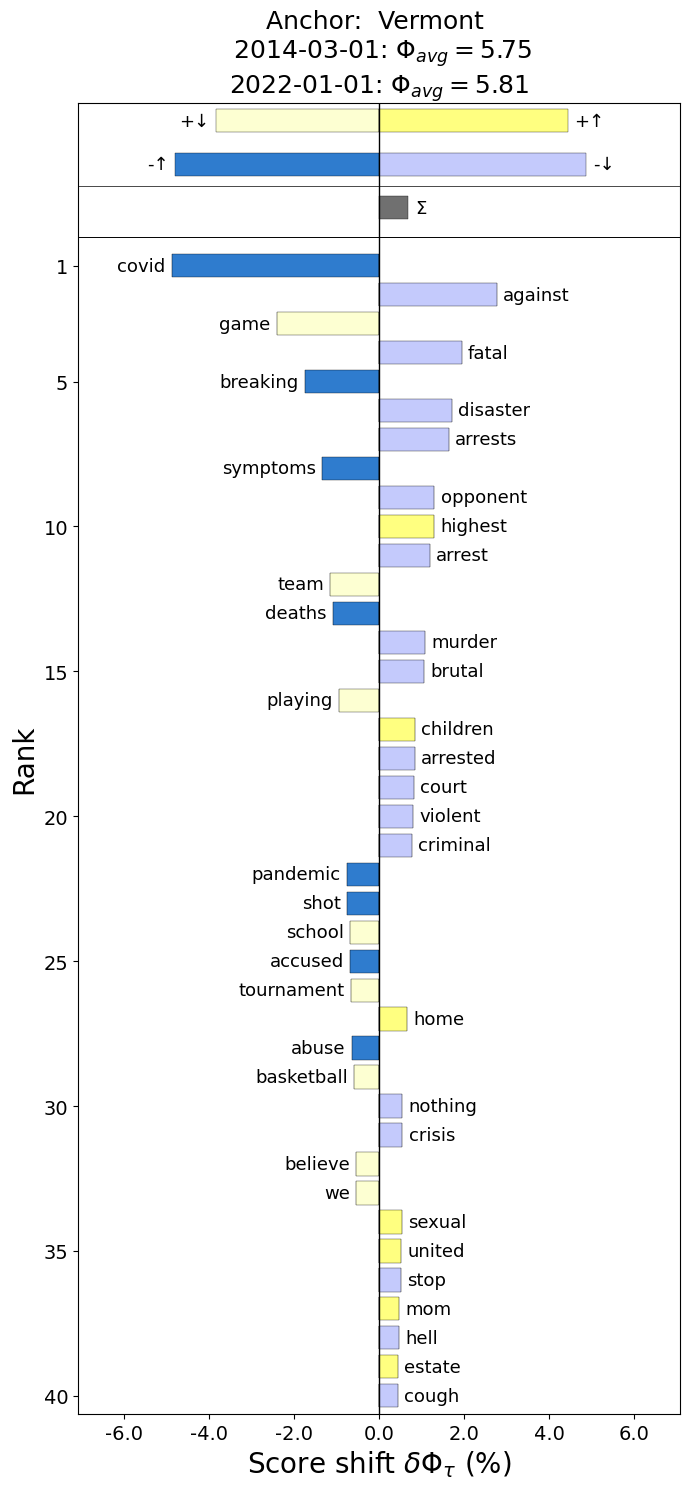

In [11]:
AI_counters.plot_sentiment_shift_dates(datetime(2014,3,1),datetime(2022,1,1));

## Comparing different counters

There are also methods to compare text corpora. Let's grab data for a different state.



Connecting on localhost
Querying...


100%|████████████████████████████████████████████████████████████████| 815892/815892 [03:42<00:00, 3664.92it/s]


Query executed in 232.79s
Tweets processed per second - 3504.89 
54532168
Plotting: maine [noRT] 
Plotting: maine [All]
Min happs: 5.87
Max happs: 6.51


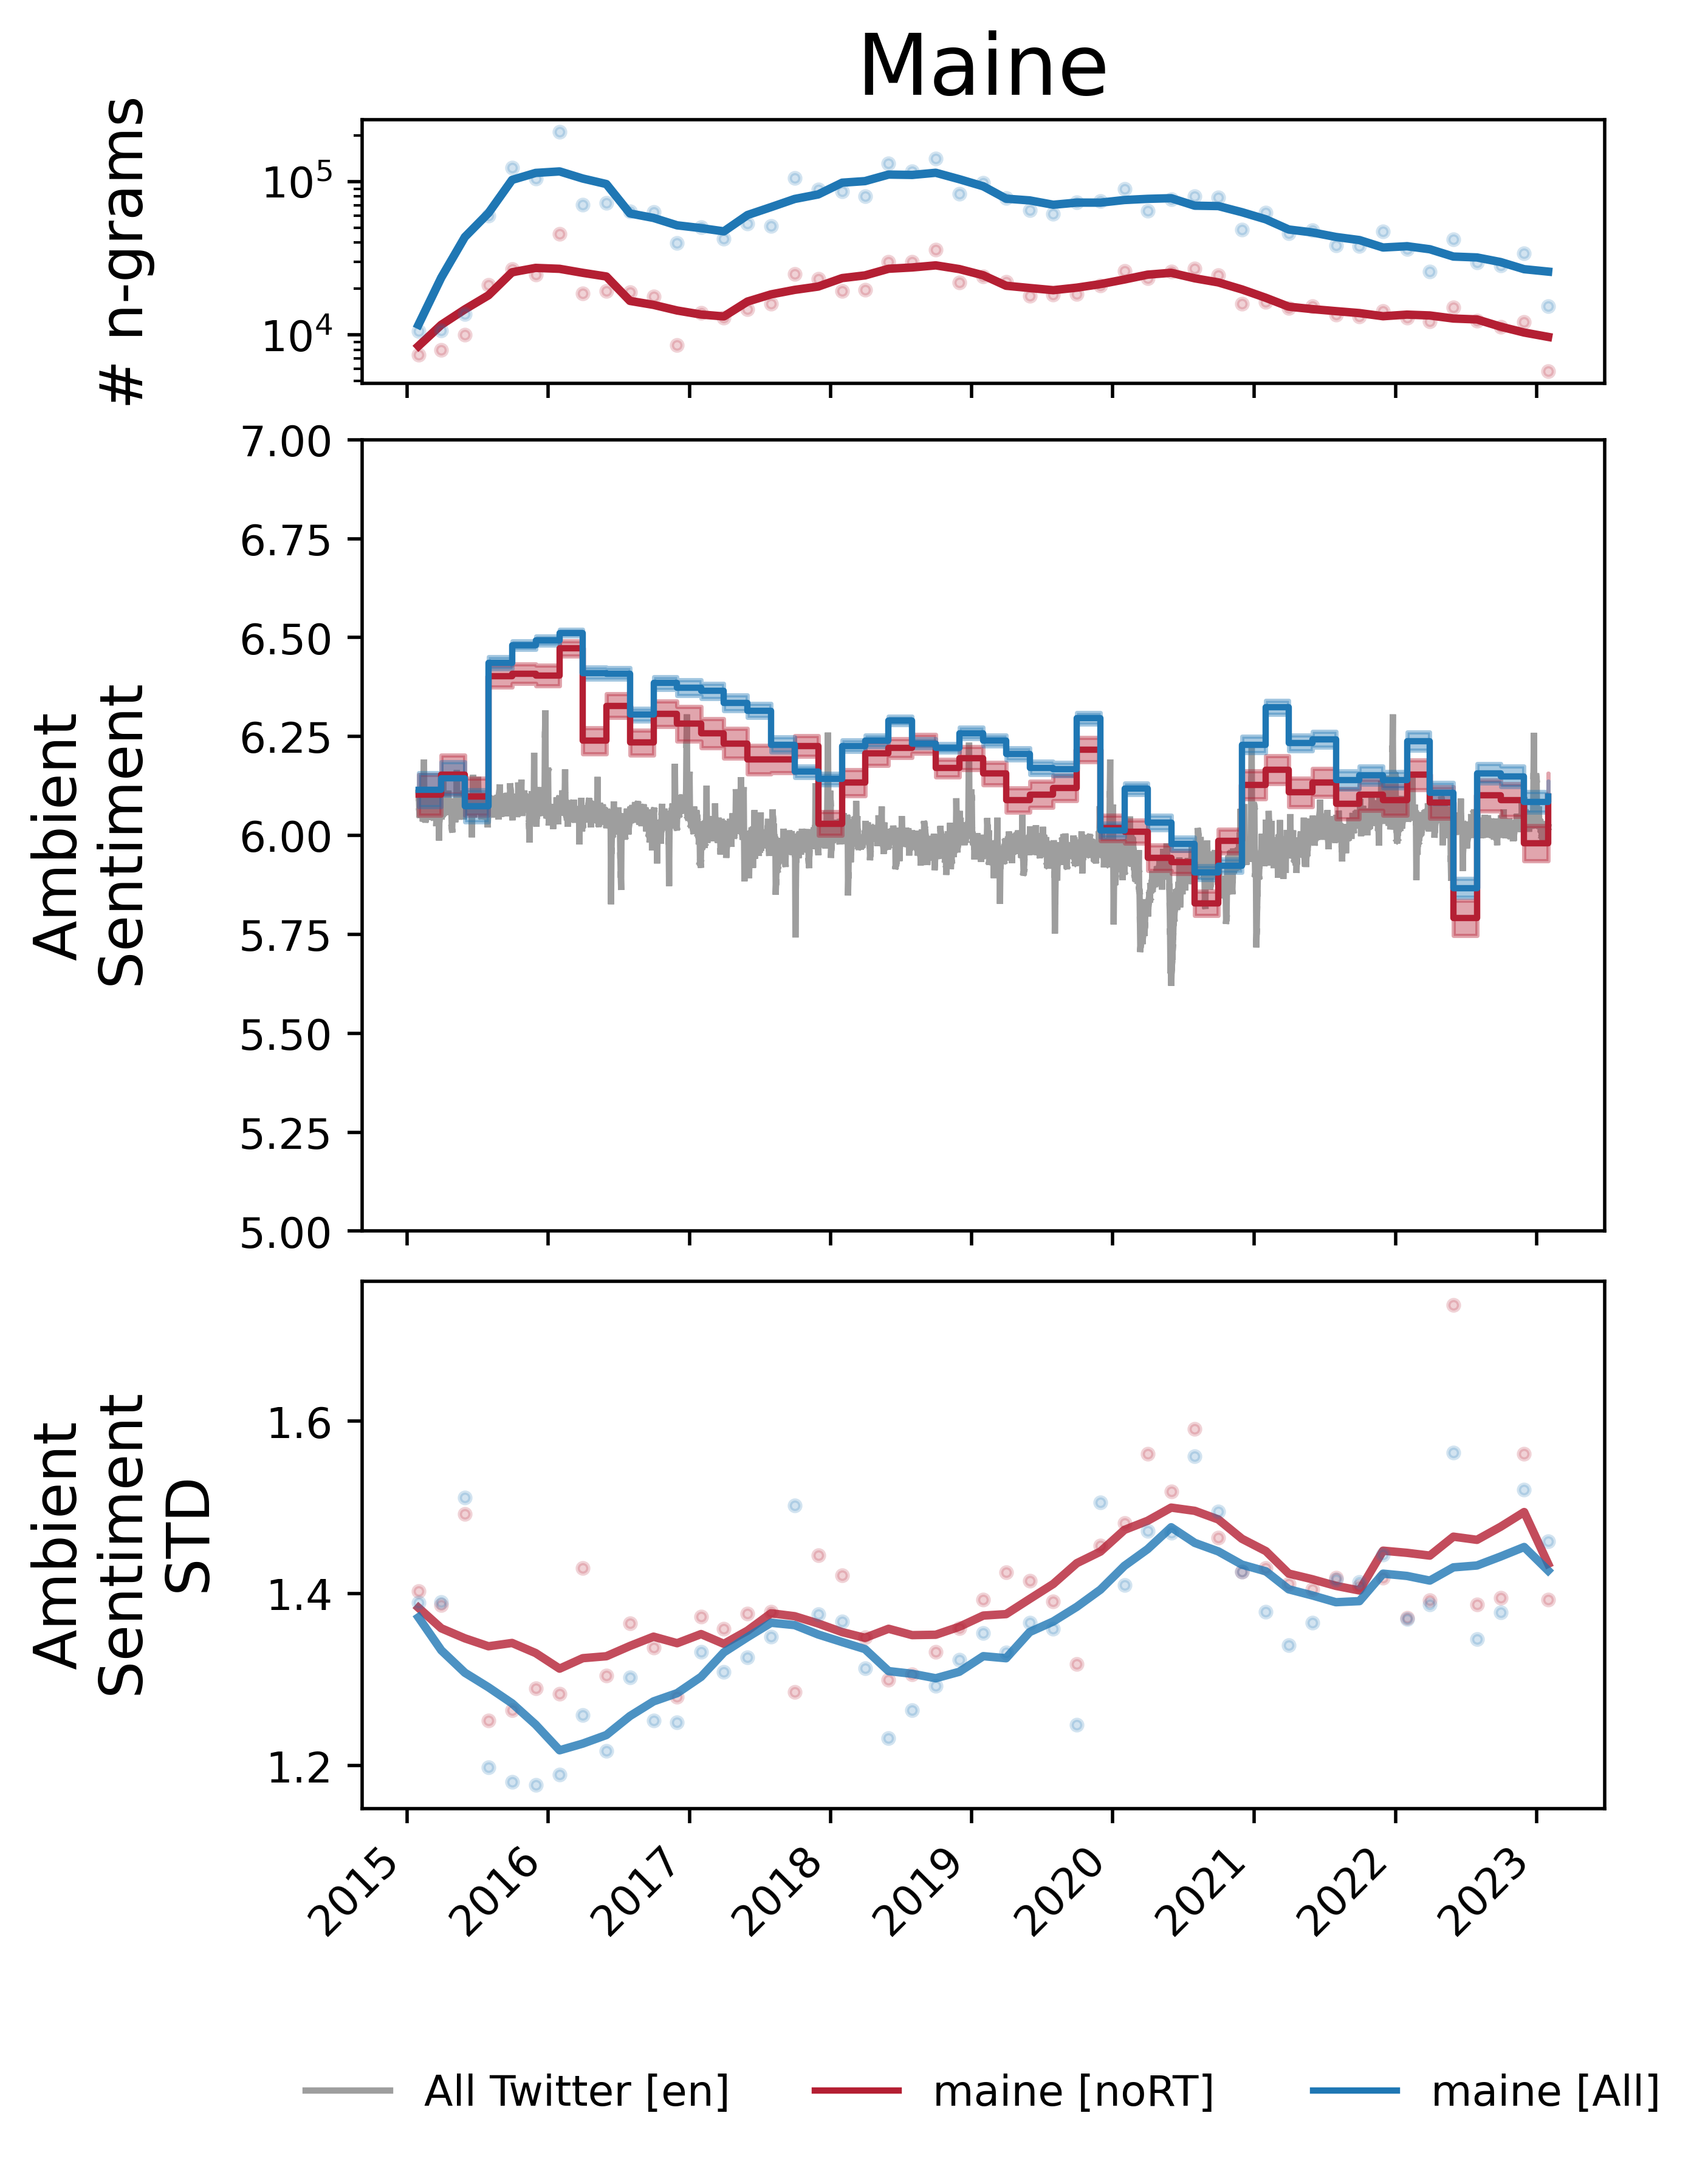

In [12]:
anchor2 = "Maine"
ML_counters = AmbientTweetCounters(dates, anchor2)
ML_counters.query(p=0.1)
ML_counters.plot_sentiment_timeseries_combined(ylims=(5.0,7.0));

The `Counter` who's method is called will be used as the reference text, and the `Counter` passed as an argument is the comparison text for the `plot_sentiment_shift_collapsed_comparision` method.

In [13]:
[*ML_counters.anchor.split(' '), *ML_counters.anchor.split(' ')]

['maine', 'maine']

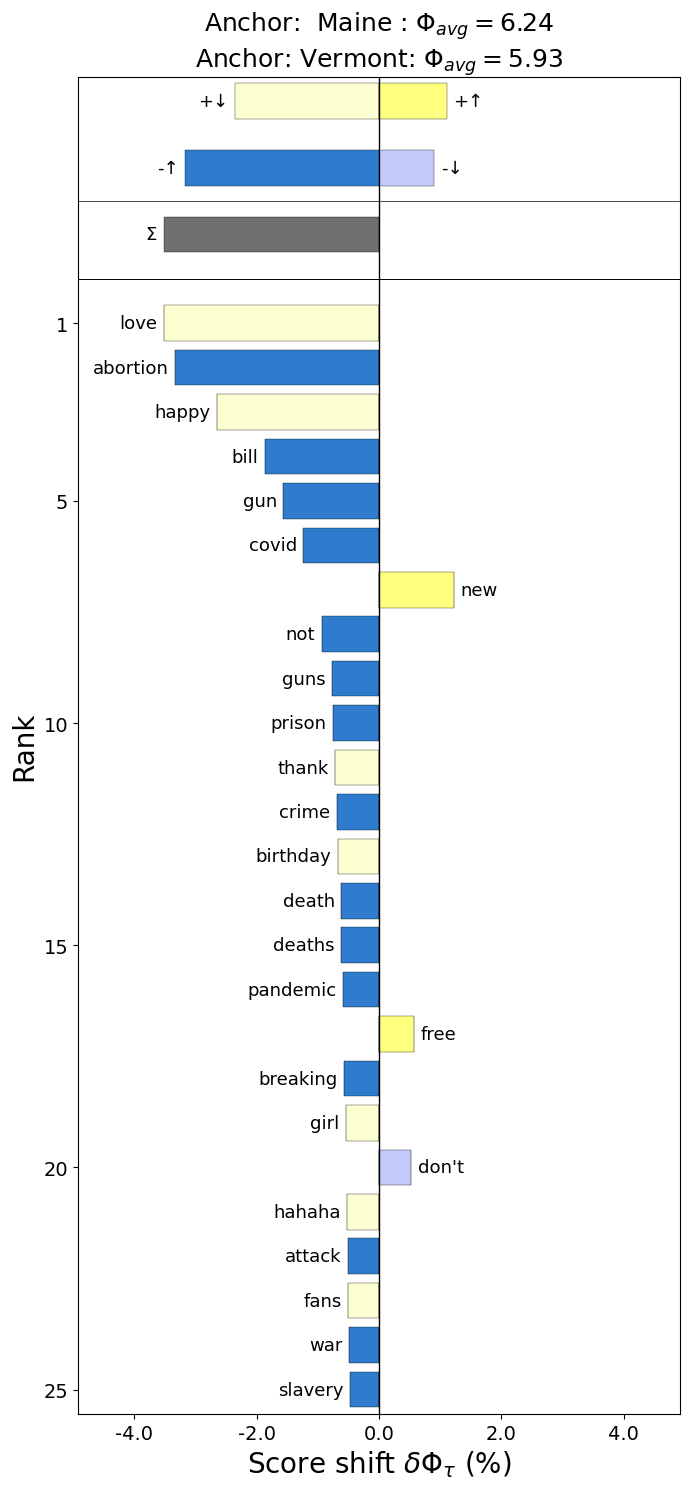

In [14]:
ML_counters.plot_sentiment_shift_collapsed_comparison(AI_counters, top_n=25);

In [14]:
ML_counters.plot_allotax_shift_collapsed_comparison(AI_counters, matlab="/Users/michael/MATLAB_R2022b.app/bin/matlab -nosplash -nodesktop")

Total n-grams for Airbus:  2527472
Total n-grams for Boeing:  5801313
/Users/michael/MATLAB_R2022b.app/bin/matlab -nosplash -nodesktop -r "fig_tweetdb('test1_2010-01-31_2023-03-31.tsv', 'test2_2010-01-31_2023-03-31.tsv', '../data/', 'Airbus_Boeing', 'Airbus \n2010-01-31 to 2023-03-31', 'Boeing \n2010-01-31 to 2023-03-31'); exit;"
/Users/michael/projects/data-mountain-query/notebooks

                            < M A T L A B (R) >
                  Copyright 1984-2022 The MathWorks, Inc.
                  R2022b (9.13.0.2049777) 64-bit (maci64)
                              August 24, 2022

 
To get started, type doc.
For product information, visit www.mathworks.com.
 

datevec1 =

        2023           3          31


datevec2 =

        2023           3          31

identifiers before creating variable names for the table. The original column
headers are saved in the VariableDescriptions property.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as
table var

2024-03-18 07:18:50.654 MATLAB_maci64[79757:5786484] CoreText note: Client requested name ".SFNS-Regular", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2024-03-18 07:18:50.654 MATLAB_maci64[79757:5786484] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2024-03-18 07:18:50.656 MATLAB_maci64[79757:5786484] CoreText note: Client requested name ".SFNS-Bold", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2024-03-18 07:18:50.665 MATLAB_maci64[79757:5786484] CoreText note: Client requested name ".SFNS-Regular", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont system

Using binwidth=0.21 for annotations in main plot (default)


ans =

  -51.3101    0.6000   51.3101    0.8000


ans =

  -48.6047    1.6000   48.6047    0.8000


ans =

  -29.9180    2.6000   29.9180    0.8000

- @airbus
- #airbus
+ max
0.00738836
+ #boeing
0.0061091
- brexit
+ @boeing
0.0058124
+ trump
0.00571012
+ dreamliner
0.00570573
+ @carcrashestv
0.00569515
- medevac
+ muilenburg
0.00534413
- patients
- eu
+ faa
0.0049371
- toulouse
- germanwings
- uk
- enders
- xwb
- activates
+ starliner
0.00467902
- easyjet
+ hhs
0.00452649
+ carolina
0.00447889
- @airbusintheuk
+ everett
0.00443866
- @emirates
+ dennis
0.00439319
+ runs
0.00437557
- broughton
- #toulouse
- french
- beluga
- #easyjet
+ nasa
0.0041791
+ shanahan
0.00415768
- albo
+ globemaster
0.00415131
- intensive
+ stock
0.00409727

++++++++++++++++++++++++++++++++++++++++++++++
+++++++ out of cheese error (ignored) ++++++++
++++++++++++++++++++++++++++++++++++++++++++++

printing (colour) to:
figallotaxonometer9000/figallot

## Conclusion

This is a work in progress, but I hope to add support for more common text manipulation methods in this package, while seperating out more advanced analyses which might require more dependan. 

If you have an idea for something to be included, please add it to the issues page at https://gitlab.com/compstorylab/data-mountain-query/-/issues

# Happy Querying!